In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [14]:
def bar_chart(f):
    survived=train[train['Survived']==1][f].value_counts()
    dead = train[train['Survived']==0][f].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','dead']
    print(df)
    df.plot(kind='bar',stacked=True,figsize=(10,5))

            1   2    3
Survived  136  87  119
dead       80  97  372


          female  male
Survived     233   109
dead          81   468


            S   C   Q
Survived  217  93  30
dead      427  75  47




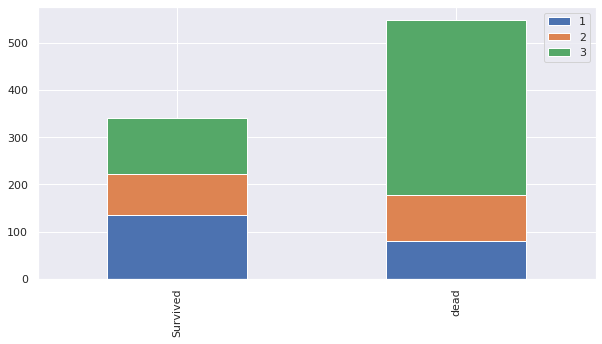

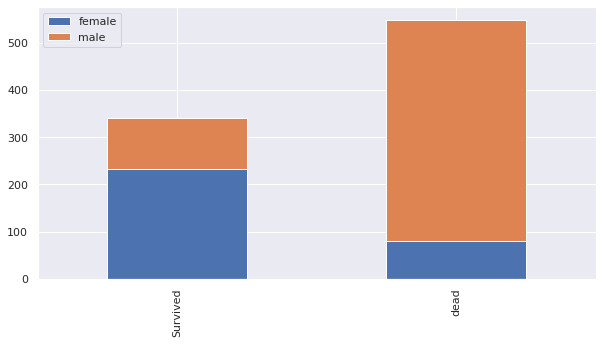

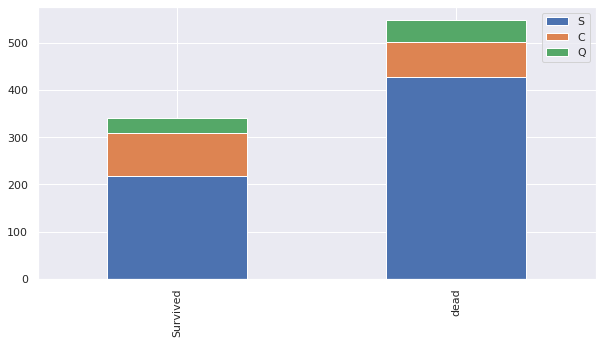

In [22]:
for i in ['Pclass','Sex','Embarked']:
    bar_chart(i)
    print('\n')

In [23]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [24]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [84]:
df_train = train.copy()
df_train = df_train.drop(['PassengerId'],axis=1)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df_train['Name'].value_counts()

de Mulder, Mr. Theodore                  1
Peuchen, Major. Arthur Godfrey           1
Farrell, Mr. James                       1
Braund, Mr. Owen Harris                  1
Slemen, Mr. Richard James                1
                                        ..
Weir, Col. John                          1
Fahlstrom, Mr. Arne Jonas                1
Hocking, Mrs. Elizabeth (Eliza Needs)    1
McNamee, Mr. Neal                        1
Gustafsson, Mr. Anders Vilhelm           1
Name: Name, Length: 891, dtype: int64

In [86]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
CA 2144     6
3101295     6
           ..
14312       1
3411        1
112053      1
349217      1
2663        1
Name: Ticket, Length: 681, dtype: int64

In [87]:
df_train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
E101           3
              ..
B39            1
E46            1
A5             1
D46            1
B71            1
Name: Cabin, Length: 147, dtype: int64

In [88]:
df_train = df_train.drop(['Name','Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [89]:
df_train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [90]:
df_train['Sex'] = np.where(df_train['Sex']=='male',0,1)
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_train['Embarked'].fillna('S',inplace=True)
map_list = {'S':1,'C':2,'Q':3}
df_train['Embarked'].replace(map_list,inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [92]:
for i in ['Pclass','Sex','Embarked']:
    df_train[i] = df_train[i].astype('category')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 37.8 KB


In [93]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


<AxesSubplot:>

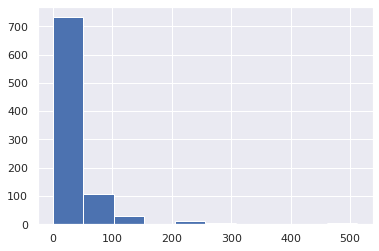

In [94]:
df_train['Fare'].hist()
## regularize fare ?

<AxesSubplot:>

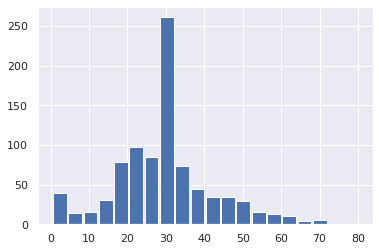

In [95]:
df_train['Age'].hist(rwidth=0.9,bins=20)

In [96]:
df_train_dummy = pd.get_dummies(df_train[['Pclass','Sex','Embarked']],drop_first=True)
df_train = pd.concat([df_train[['Survived','Age','SibSp','Parch','Fare']],df_train_dummy],axis=1)
df_train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_1,Embarked_2,Embarked_3
0,0,22.0,1,0,7.2500,0,1,0,0,0
1,1,38.0,1,0,71.2833,0,0,1,1,0
2,1,26.0,0,0,7.9250,0,1,1,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,0


In [98]:
Y_train = df_train['Survived']
X_train = df_train.drop('Survived',axis=1)
print('X_train : ',X_train.shape)
print('Y_train : ',Y_train.shape)

X_train :  (891, 9)
Y_train :  (891,)


In [102]:
from sklearn.model_selection import KFold , cross_val_score
K_fold = KFold(n_splits=10, shuffle=True,random_state=1234)


In [106]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()
pred_lr = cross_val_score(clf,X_train,Y_train,cv=K_fold,n_jobs=-1,scoring='accuracy')
print(pred_lr)
print("\nAvg. Accuracy : ",round(np.mean(pred_lr)*100,2))

[0.84444444 0.84269663 0.78651685 0.82022472 0.79775281 0.82022472
 0.78651685 0.73033708 0.82022472 0.78651685]

Avg. Accuracy :  80.35


In [107]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=13)
pred_knn = cross_val_score(clf_knn,X_train,Y_train,cv=K_fold,n_jobs=-1,scoring='accuracy')
print(pred_knn)
print("\nAvg. Accuracy : ",round(np.mean(pred_knn)*100,2))


[0.67777778 0.65168539 0.68539326 0.7752809  0.69662921 0.74157303
 0.71910112 0.66292135 0.71910112 0.74157303]

Avg. Accuracy :  70.71


In [108]:
from sklearn.svm import LinearSVC
clf_svc = LinearSVC()
pred_svc = cross_val_score(clf_svc,X_train,Y_train,cv=K_fold,n_jobs=-1,scoring='accuracy')
print(pred_svc)
print("\nAvg. Accuracy : ",round(np.mean(pred_svc)*100,2))


[0.83333333 0.64044944 0.75280899 0.84269663 0.66292135 0.6741573
 0.34831461 0.75280899 0.43820225 0.70786517]

Avg. Accuracy :  66.54


In [109]:
# DT
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
pred_dt = cross_val_score(clf_dt,X_train,Y_train,cv=K_fold,n_jobs=-1,scoring='accuracy')
print(pred_dt)
print("\nAvg. Accuracy : ",round(np.mean(pred_dt)*100,2))



[0.86666667 0.75280899 0.80898876 0.76404494 0.79775281 0.75280899
 0.83146067 0.75280899 0.7752809  0.75280899]

Avg. Accuracy :  78.55


In [110]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [119]:
df_test = test.copy()
df_test = df_test.drop(['Name','Ticket','Cabin'],axis=1)
df_test['Sex'] = np.where(df_test['Sex']=='male',0,1)
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)
df_test['Embarked'].fillna('S',inplace=True)
map_list = {'S':1,'C':2,'Q':3}
df_test['Embarked'].replace(map_list,inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,3
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,3
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1


In [120]:
for i in ['Pclass','Sex','Embarked']:
    df_test[i] = df_test[i].astype('category')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Sex          418 non-null    category
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         417 non-null    float64 
 7   Embarked     418 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 18.0 KB


In [121]:
df_test['Fare'].fillna(df_test['Fare'].mode(),inplace=True)

In [122]:
df_test_dummy = pd.get_dummies(df_test[['Pclass','Sex','Embarked']],drop_first=True)
df_test = pd.concat([df_test[['PassengerId','Age','SibSp','Parch','Fare']],df_test_dummy],axis=1)
df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_1,Embarked_2,Embarked_3
0,892,34.5,0,0,7.8292,0,1,0,0,1
1,893,47.0,1,0,7.0000,0,1,1,0,0
2,894,62.0,0,0,9.6875,1,0,0,0,1
3,895,27.0,0,0,8.6625,0,1,0,0,0
4,896,22.0,1,1,12.2875,0,1,1,0,0


In [123]:
PassID = df_test['PassengerId']
X_test = df_test.drop('PassengerId',axis=1)
X_test.shape

(418, 9)

In [128]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression()
pred_lr = cross_val_score(clf,X_train,Y_train,cv=K_fold,n_jobs=-1,scoring='accuracy')
print(pred_lr)
print("\nAvg. Accuracy : ",round(np.mean(pred_lr)*100,2))

[0.84444444 0.84269663 0.78651685 0.82022472 0.79775281 0.82022472
 0.78651685 0.73033708 0.82022472 0.78651685]

Avg. Accuracy :  80.35


In [129]:
clf.fit(X_train,Y_train)

/home/himanshu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [135]:
X_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Pclass_2    418 non-null    uint8  
 5   Pclass_3    418 non-null    uint8  
 6   Sex_1       418 non-null    uint8  
 7   Embarked_2  418 non-null    uint8  
 8   Embarked_3  418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


In [136]:
Y_predict = clf.predict(X_test)
Y_predict.shape

(418,)

In [139]:
submission = pd.DataFrame({
    "PassengerId":PassID,
    "Survived":Y_predict
})
submission.to_csv('Submission.csv',index=False)

In [140]:
sub=pd.read_csv('Submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
